In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from dcst import dst, idst  # Ensure dcst.py is in the working directory

In [17]:
# Constants
L = 1.0          # Length of the box
N = 1000         # Number of slices
m = 1.0          # Particle mass (arbitrary units)
hbar = 1.0       # Reduced Planck's constant (arbitrary units)
t = 1e-7        # Time at which to compute the wavefunction (ns)

# Discretize the box
x = np.linspace(0, L, N, endpoint=False)

# Initial wavefunction: real and imaginary parts (example function)
psi_real = np.sin(np.pi * x / L)  # Example real part
psi_imag = np.zeros_like(x)       # Example imaginary part (purely real initial wavefunction)

In [19]:
# Perform discrete sine transforms
alpha_k = dst(psi_real)  # DST for the real part
eta_k = dst(psi_imag)    # DST for the imaginary part

# Energy levels (E_k = hbar^2 k^2 pi^2 / (2mL^2))
k_values = np.arange(1, N)  # k = 1 to N-1
E_k = (hbar**2 * k_values**2 * np.pi**2) / (2 * m * L**2)

# Time evolution of coefficients
alpha_k_t = alpha_k[:N-1] * np.cos(E_k * t / hbar) - eta_k[:N-1] * np.sin(E_k * t / hbar)
eta_k_t = alpha_k[:N-1] * np.sin(E_k * t / hbar) + eta_k[:N-1] * np.cos(E_k * t / hbar)

# Combine back into real part of psi(x, t)
b_k_t = alpha_k_t + 1j * eta_k_t  # Updated coefficients
psi_real_t = idst(b_k_t.real)  # Inverse sine transform for real part


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/86/ksc_y72s4jxg27c51vdv7fkm0000gn/T/ipykernel_32611/710793043.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(x, psi_real_t, label=f"Real part of $\psi(x, t)$ at t = {t} s")
/var/folders/86/ksc_y72s4jxg27c51vdv7fkm0000gn/T/ipykernel_32611/710793043.py:8: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Re($\psi(x, t)$)")
/var/folders/86/ksc_y72s4jxg27c51vdv7fkm0000gn/T/ipykernel_32611/710793043.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Real part of the wavefunction $\psi(x, t)$")


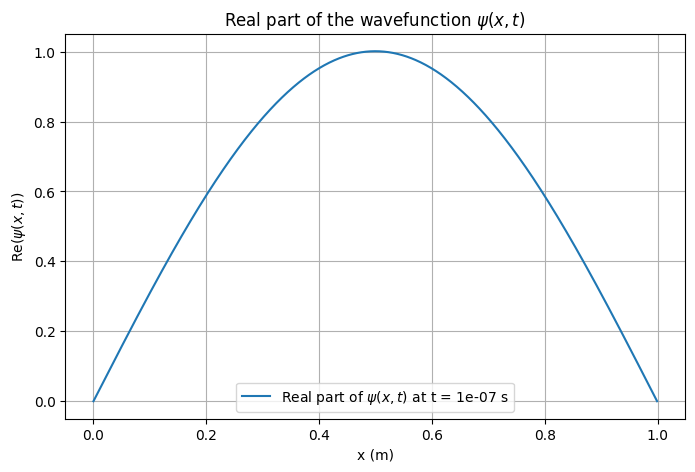

In [20]:
# Adjust length to match x grid (if necessary)
psi_real_t = np.pad(psi_real_t, (0, 1), mode='constant', constant_values=0)

# Plot the real part of the wavefunction
plt.figure(figsize=(8, 5))
plt.plot(x, psi_real_t, label=f"Real part of $\psi(x, t)$ at t = {t} s")
plt.xlabel("x (m)")
plt.ylabel("Re($\psi(x, t)$)")
plt.title("Real part of the wavefunction $\psi(x, t)$")
plt.legend()
plt.grid()
plt.show()


<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
/var/folders/86/ksc_y72s4jxg27c51vdv7fkm0000gn/T/ipykernel_32611/4091824726.py:38: SyntaxWarning: invalid escape sequence '\p'
  line, = ax.plot(x, np.zeros_like(x), label="Re($\psi(x, t)$)")
/var/folders/86/ksc_y72s4jxg27c51vdv7fkm0000gn/T/ipykernel_32611/4091824726.py:42: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("Re($\psi(x, t)$)")


Saving animation
Animation saved. Open question1_wavefunction_animation.gif to view it


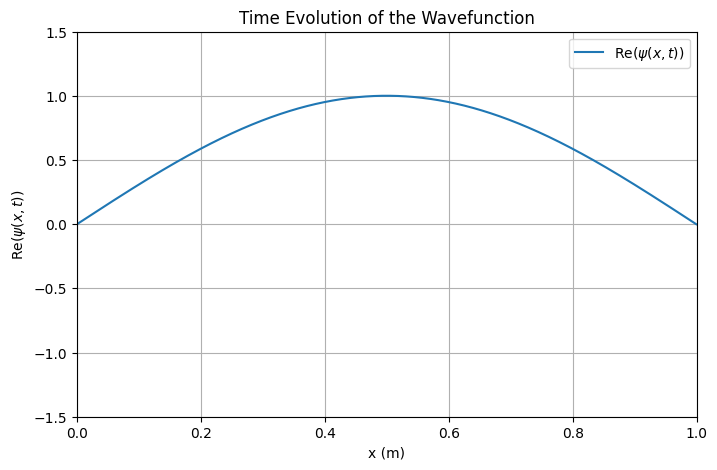

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from dcst import dst, idst  # Ensure dcst.py is in the working directory

# Constants
L = 1.0          # Length of the box
N = 1000         # Number of slices
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
m = 9.10938356e-31    # Mass of the particle (electron mass in kg)
time_step = 1e-18      # Time interval between frames (s)

# Discretize the box
x = np.linspace(0, L, N, endpoint=False)

# Initial wavefunction: real and imaginary parts (example function)
psi_real = np.sin(np.pi * x / L)  # Example real part
psi_imag = np.zeros_like(x)       # Example imaginary part (purely real initial wavefunction)

# Perform discrete sine transforms
alpha_k = dst(psi_real)  # DST for the real part
eta_k = dst(psi_imag)    # DST for the imaginary part

# Energy levels (E_k = hbar^2 k^2 pi^2 / (2mL^2))
k_values = np.arange(1, N)  # k = 1 to N-1
E_k = (hbar**2 * k_values**2 * np.pi**2) / (2 * m * L**2)

# Function to compute real part of the wavefunction at time t
def compute_wavefunction(t):
    alpha_k_t = alpha_k[:N-1] * np.cos(E_k * t / hbar) - eta_k[:N-1] * np.sin(E_k * t / hbar)
    eta_k_t = alpha_k[:N-1] * np.sin(E_k * t / hbar) + eta_k[:N-1] * np.cos(E_k * t / hbar)
    b_k_t = alpha_k_t + 1j * eta_k_t  # Updated coefficients
    psi_real_t = idst(b_k_t.real)  # Inverse sine transform for real part
    return np.pad(psi_real_t, (0, 1), mode='constant', constant_values=0)  # Adjust to match grid

# Create the figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, np.zeros_like(x), label="Re($\psi(x, t)$)")
ax.set_xlim(0, L)
ax.set_ylim(-1.5, 1.5)  # Adjust based on expected wavefunction amplitude
ax.set_xlabel("x (m)")
ax.set_ylabel("Re($\psi(x, t)$)")
ax.set_title("Time Evolution of the Wavefunction")
ax.legend()
ax.grid()

# Animation update function
def update(frame):
    t = frame * time_step
    psi_real_t = compute_wavefunction(t)
    line.set_ydata(psi_real_t)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)


# Save or display the animation
print("Saving animation...")
ani.save("question1_wavefunction_animation.gif", writer=PillowWriter(fps=20))
print("Animation saved. Open question1_wavefunction_animation.gif to view it")
plt.show()
